#### Analyzing the Data Distribution

### Finding How the Data is Distributed

##### Import Libraries and Load Data

Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\cleaned_survey_data1.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,Language
0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,NaN,8.0,5-10,JavaScript
1,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,NaN,8.0,5-10,Python
2,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,0.0,15.0,0.0,0.0,Appropriate in length,Easy,NaN,8.0,5-10,Ruby
3,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,NaN,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,NaN,8.0,10-20,Bash/Shell (all shells)
4,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,NaN,...,0.0,20.0,10.0,10.0,Appropriate in length,Easy,NaN,8.0,10-20,C#


Copy it into another dataframe so that the original data remains uanffected.

In [3]:
df = dfo.copy()

##### Handle Missing Data

Identify missing values in the dataset.

In [4]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
SurveyEase              1949
ConvertedCompYearly    70566
JobSat                     0
ExperienceRange            0
Language                   0
Length: 116, dtype: int64

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

CodingActivities          39
LearnCode                160
LearnCodeOnline        24442
TechDoc                40222
YearsCode                244
                       ...  
JobSatPoints_10          542
JobSatPoints_11          591
SurveyLength            1981
SurveyEase              1949
ConvertedCompYearly    70566
Length: 99, dtype: int64

In [9]:
missing_cols_list = df.isnull().sum()[df.isnull().sum()>0].index.tolist()
print(missing_cols_list)

['CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Currency', 'CompTotal', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHave

Impute or remove missing values as necessary to ensure data completeness.

In [ ]:
# Drop columns with too many missing values

threshold = 0.8  # e.g., drop columns with >80% missing

cols_to_drop = [col for col in missing_cols_list if df[col].isnull().mean() > threshold]

df.drop(columns=cols_to_drop, inplace=True)


In [11]:
print(missing_cols_list)

['CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Currency', 'CompTotal', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHave

In [13]:
df.isnull().sum()[df.isnull().sum()>0].sort_values()

CodingActivities                  39
LearnCode                        160
DevType                          177
YearsCode                        244
ICorPM                           432
                               ...  
AINextMore integrated          86967
EmbeddedWantToWorkWith        100114
EmbeddedAdmired               102346
AINextMuch more integrated    117635
AINextNo change               120907
Length: 97, dtype: int64

In [23]:
# For numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Numeric Columns:\n")

for col in num_cols:
    if col in missing_cols_list:
        print(col)

Numeric Columns:

CompTotal
WorkExp
JobSatPoints_4
JobSatPoints_5
JobSatPoints_6
JobSatPoints_7
JobSatPoints_8
JobSatPoints_9
JobSatPoints_10
JobSatPoints_11
ConvertedCompYearly


In [36]:
print(df['WorkExp'].sample(8))

print("Null Values: ", df['WorkExp'].isnull().sum())

48085     NaN
68954     3.0
148080    1.0
59737     4.0
104349    1.0
20000     NaN
3451      5.0
70880     9.0
Name: WorkExp, dtype: float64
Null Values:  779


In [ ]:
# Check the columns and missing values in them

for col in num_cols:
    if col in missing_cols_list:
        print(col)
        print(df[col].sample(5))
        print("Null Values: ", df[col].isnull().sum())
        print("\n")

CompTotal
141143      50000.0
103205          NaN
112946      60000.0
123293      86000.0
18636     1152000.0
Name: CompTotal, dtype: float64
Null Values:  36726


WorkExp
81680     40.0
141746    12.0
140418    10.0
22132     25.0
43265      6.0
Name: WorkExp, dtype: float64
Null Values:  779


JobSatPoints_4
149131    0.0
424       0.0
106262    0.0
133445    0.0
112901    0.0
Name: JobSatPoints_4, dtype: float64
Null Values:  827


JobSatPoints_5
696        25.0
34791       0.0
155455     10.0
65565      10.0
39964     100.0
Name: JobSatPoints_5, dtype: float64
Null Values:  755


JobSatPoints_6
93029      0.0
96410      0.0
13338      0.0
106691     0.0
118843    15.0
Name: JobSatPoints_6, dtype: float64
Null Values:  541


JobSatPoints_7
117339    20.0
15996     30.0
22633     80.0
84211     80.0
97724     20.0
Name: JobSatPoints_7, dtype: float64
Null Values:  538


JobSatPoints_8
17137      0.0
100461     0.0
52183     30.0
22109      0.0
96849      0.0
Name: JobSatPoints_8, dty

In [ ]:
# Replace missing values with median

for col in num_cols:
    if col in missing_cols_list:
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# Check again for missing values

for col in num_cols:
    if col in missing_cols_list:
        print(col)
        print("Null Values: ", df[col].isnull().sum())
        print("\n")

CompTotal
Null Values:  0


WorkExp
Null Values:  0


JobSatPoints_4
Null Values:  0


JobSatPoints_5
Null Values:  0


JobSatPoints_6
Null Values:  0


JobSatPoints_7
Null Values:  0


JobSatPoints_8
Null Values:  0


JobSatPoints_9
Null Values:  0


JobSatPoints_10
Null Values:  0


JobSatPoints_11
Null Values:  0


ConvertedCompYearly
Null Values:  0




In [26]:
# For categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns:\n")

for col in cat_cols:
    if col in missing_cols_list:
        print(col)

Categorical Columns:

CodingActivities
LearnCode
LearnCodeOnline
TechDoc
YearsCode
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Currency
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantToWorkWith
AISearchDevAdmired
SOVisitFreq
SOAccount
SOPartFreq
SOHow
SOComm
AISent
AIBen
AIAcc
A

In [ ]:
# Check the columns and missing values in them

for col in cat_cols:
    if col in missing_cols_list:
        print(col)
        print(df[col].sample(5))
        print("Null Values: ", df[col].isnull().sum())
        print("\n")

CodingActivities
46643     Hobby;Contribute to open-source projects;Boots...
73423              Hobby;Contribute to open-source projects
111667                             Bootstrapping a business
59954                              Bootstrapping a business
20269              Hobby;Contribute to open-source projects
Name: CodingActivities, dtype: object
Null Values:  39


LearnCode
141857    Books / Physical media;Colleague;On the job tr...
6502      Other online resources (e.g., videos, blogs, f...
146944                               Books / Physical media
28250     Colleague;On the job training;School (i.e., Un...
93595     Books / Physical media;School (i.e., Universit...
Name: LearnCode, dtype: object
Null Values:  160


LearnCodeOnline
90104     Technical documentation;Blogs;Books;Written Tu...
139607                                                  NaN
62450     Technical documentation;Blogs;Written Tutorial...
68138     Technical documentation;Blogs;Written Tutorial...
11433    

In [ ]:
# Replace missing values with mode

for col in cat_cols:
    if col in missing_cols_list:
        df[col] = df[col].fillna(df[col].mode()[0])

In [42]:
# Check again for missing values

for col in cat_cols:
    if col in missing_cols_list:
        print(col)
        print("Null Values: ", df[col].isnull().sum())
        print("\n")

CodingActivities
Null Values:  0


LearnCode
Null Values:  0


LearnCodeOnline
Null Values:  0


TechDoc
Null Values:  0


YearsCode
Null Values:  0


DevType
Null Values:  0


OrgSize
Null Values:  0


PurchaseInfluence
Null Values:  0


BuyNewTool
Null Values:  0


BuildvsBuy
Null Values:  0


TechEndorse
Null Values:  0


Currency
Null Values:  0


LanguageWantToWorkWith
Null Values:  0


LanguageAdmired
Null Values:  0


DatabaseHaveWorkedWith
Null Values:  0


DatabaseWantToWorkWith
Null Values:  0


DatabaseAdmired
Null Values:  0


PlatformHaveWorkedWith
Null Values:  0


PlatformWantToWorkWith
Null Values:  0


PlatformAdmired
Null Values:  0


WebframeHaveWorkedWith
Null Values:  0


WebframeWantToWorkWith
Null Values:  0


WebframeAdmired
Null Values:  0


EmbeddedHaveWorkedWith
Null Values:  0


EmbeddedWantToWorkWith
Null Values:  0


EmbeddedAdmired
Null Values:  0


MiscTechHaveWorkedWith
Null Values:  0


MiscTechWantToWorkWith
Null Values:  0


MiscTechAdmired
Null Valu

In [43]:
df.isnull().sum()

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
ExperienceRange        0
Language               0
Length: 114, dtype: int64

##### Analyze Key Columns

Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

Calculate the value counts for each column to understand the distribution of responses.

In [48]:
key_cols = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_cols:
    print(f"\n{col} value counts :")
    print(df[col].value_counts())


Employment value counts :
Employment
Employed, full-time                                                                                                                                   116096
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               13914
Independent contractor, freelancer, or self-employed                                                                                                    6896
Student, full-time;Employed, part-time                                                                                                                  3210
Employed, full-time;Student, part-time                                                                                                                  3079
                                                                                                                                                       ...  
Employed, full-time;

**Observation**:

1. `Employment` (Categorical, Multi-label):
* Highly skewed: Most respondents are “Employed, full-time”.
* Multi-label entries (separated by ;), e.g., "Employed, full-time;Independent contractor..." — these need to be split or simplified.
* 63 unique combinations — that’s a lot. Consider grouping into broader categories
* _Suggestion_: Create new binary flags or map to simplified single-label categories using .str.contains().

2. `JobSat` (Numeric/Ordinal):
* On a scale of 0 to 10, clearly ordinal.
* Most respondents score in the range 6–9.
* Very few selected 0–2.
* _Suggestion_: Treat as ordinal for modeling (not categorical). May normalize it or bin it into levels like: { 0–3: Low, 4–6: Medium, 7–10: High }

3. `YearsCodePro` (Converted to Numeric):
* Range is 1 to 50 years.
* Distribution is right-skewed (many with <10 years).
* Has outliers (e.g., 50 years), but those are realistic.
* _Suggestion_: Keep as is for regression. If needed, bin into experience levels, e.g.: { 0–2: Beginner, 3–5: Junior, 6–10: Mid, 11–20: Senior, 20: Expert}

##### Visualize Job Satisfaction (Focus on JobSat)

* Create a pie chart or KDE plot to visualize the distribution of JobSat.

* Provide an interpretation of the plot, highlighting key trends in job satisfaction.

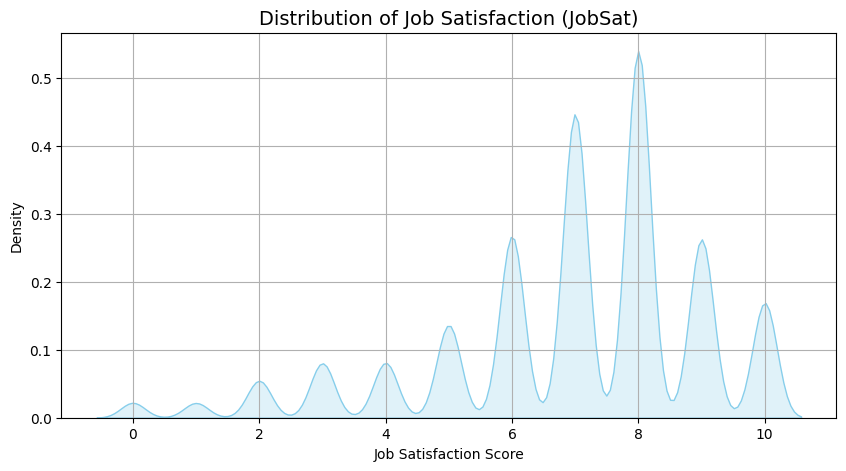

In [51]:
# KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['JobSat'].dropna(), fill=True, color='skyblue')
plt.title('Distribution of Job Satisfaction (JobSat)', fontsize=14)
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

* The KDE curve shows the density distribution of satisfaction scores ranging from 0 to 10.
* The curve typically peaks around 7 and 8, suggesting most respondents rate their job satisfaction as above average.
* There’s a long tail on the lower end (0 to 4), meaning fewer respondents are highly dissatisfied.
* The distribution is slightly left-skewed, indicating generally high job satisfaction among most participants.

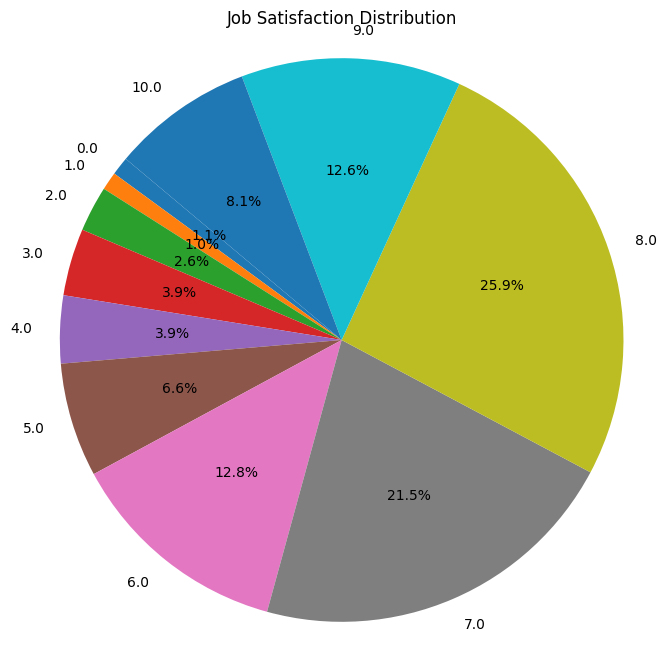

In [ ]:
# Pie chart

# Get value counts
job_sat_counts = df['JobSat'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Job Satisfaction Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()


* The largest slices of the pie are scores 6, 7, 8, and 9, which together make up a majority of the responses.
* Score 8 is the most frequent, indicating it’s the most common satisfaction level.
* Very low scores (0, 1, 2) form smaller slices, showing fewer participants are deeply unhappy with their jobs.
* This suggests a positive overall sentiment towards job satisfaction in the dataset.

Key Trends:

* High satisfaction (7–10) dominates → workforce generally content.

* Low satisfaction (0–3) is rare → limited number of unhappy professionals.

* The data hints at a healthy workplace climate, but there's still a minority expressing dissatisfaction.

##### Programming Languages Analysis

Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.

In [ ]:
# Both `LanguageHaveWorkedWith` and `LanguageWantToWorkWith` columns contain semicolon-separated strings.
# First, split and explode these columns to get individual language counts.

# Explode and count values
have_worked = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().value_counts()
want_to_work = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().value_counts()

# Combine into a single DataFrame
lang_df = pd.DataFrame({
    'HaveWorkedWith': have_worked,
    'WantToWorkWith': want_to_work
}).fillna(0)

lang_df.sample(5)

,HaveWorkedWith,WantToWorkWith
VBA,9749,2534
MicroPython,4069,3921
Erlang,2940,4730
Apex,2469,1465
Perl,7403,3170


Visualize the overlap or differences using a Venn diagram or a grouped bar chart.

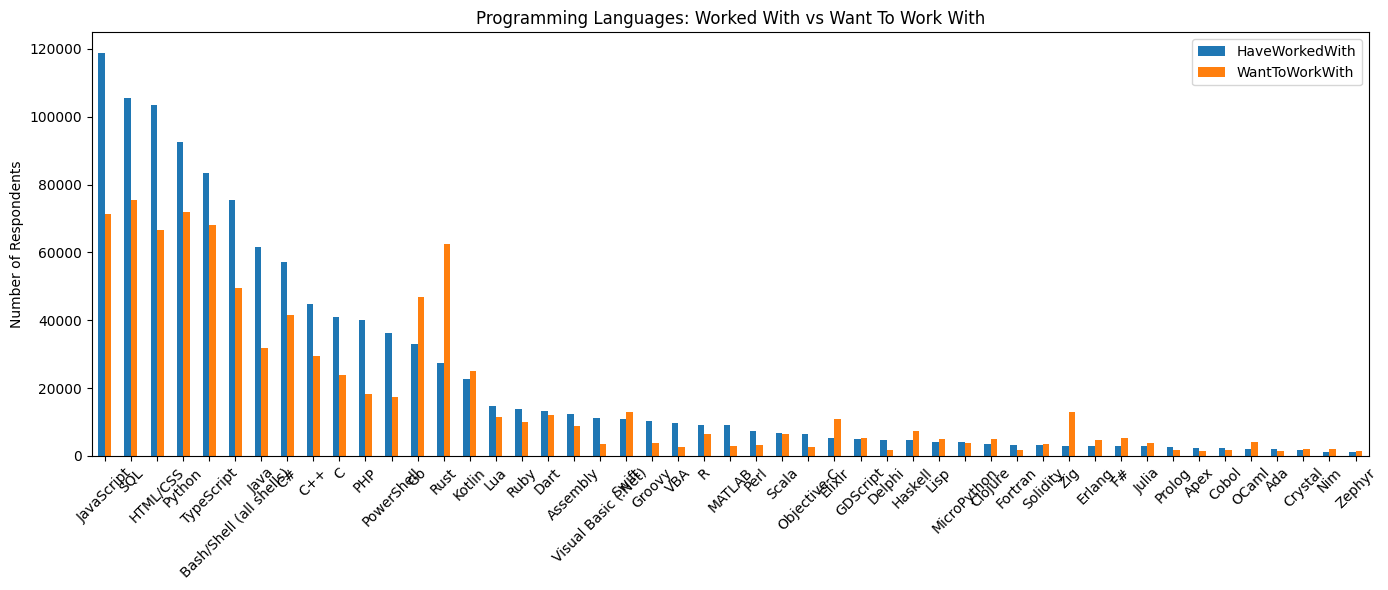

In [57]:
# Grouped Bar Chart

lang_df_sorted = lang_df.sort_values(by='HaveWorkedWith', ascending=False)  

lang_df_sorted.plot(kind='bar', figsize=(14, 6))
plt.title('Programming Languages: Worked With vs Want To Work With')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Python & JavaScript are both widely used and highly desired.

* Rust, Go, Kotlin are more wanted than used — rising in popularity.

* Java, PHP, C are used more than wanted — seen as less preferred.

* Perl, VB.NET are low in both — declining interest.

* The chart highlights current favorites, emerging trends, and fading technologies.

##### Analyze Remote Work Trends

Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.

In [58]:
# Group Country and RemoteWork
remote_by_region = df.groupby(['Country', 'RemoteWork']).size().unstack()

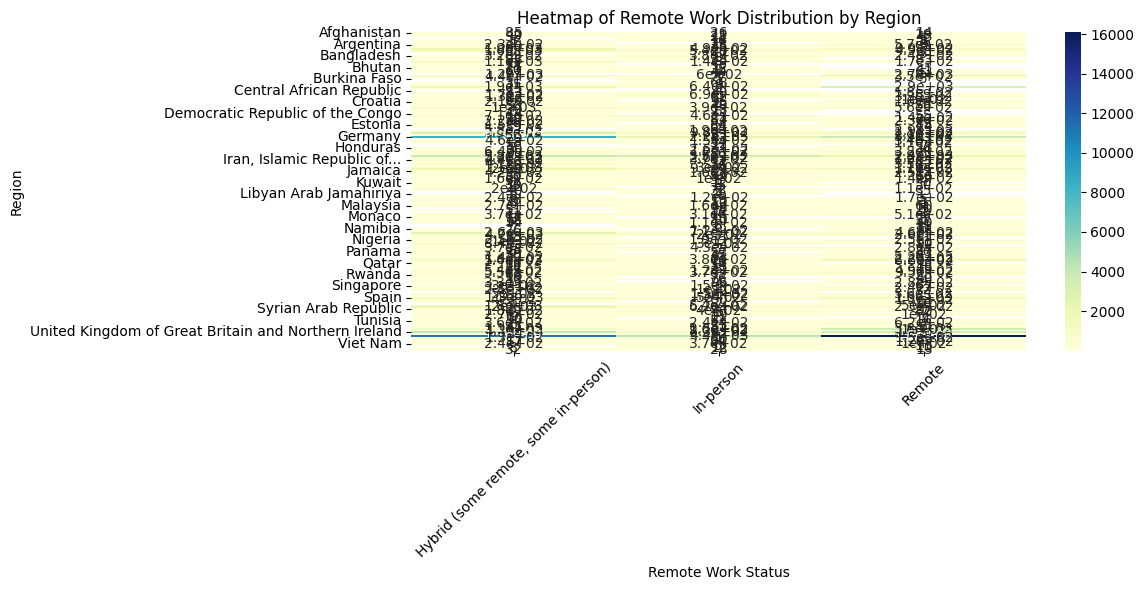

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(remote_by_region, annot=True, cmap='YlGnBu')

plt.title('Heatmap of Remote Work Distribution by Region')
plt.xlabel('Remote Work Status')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

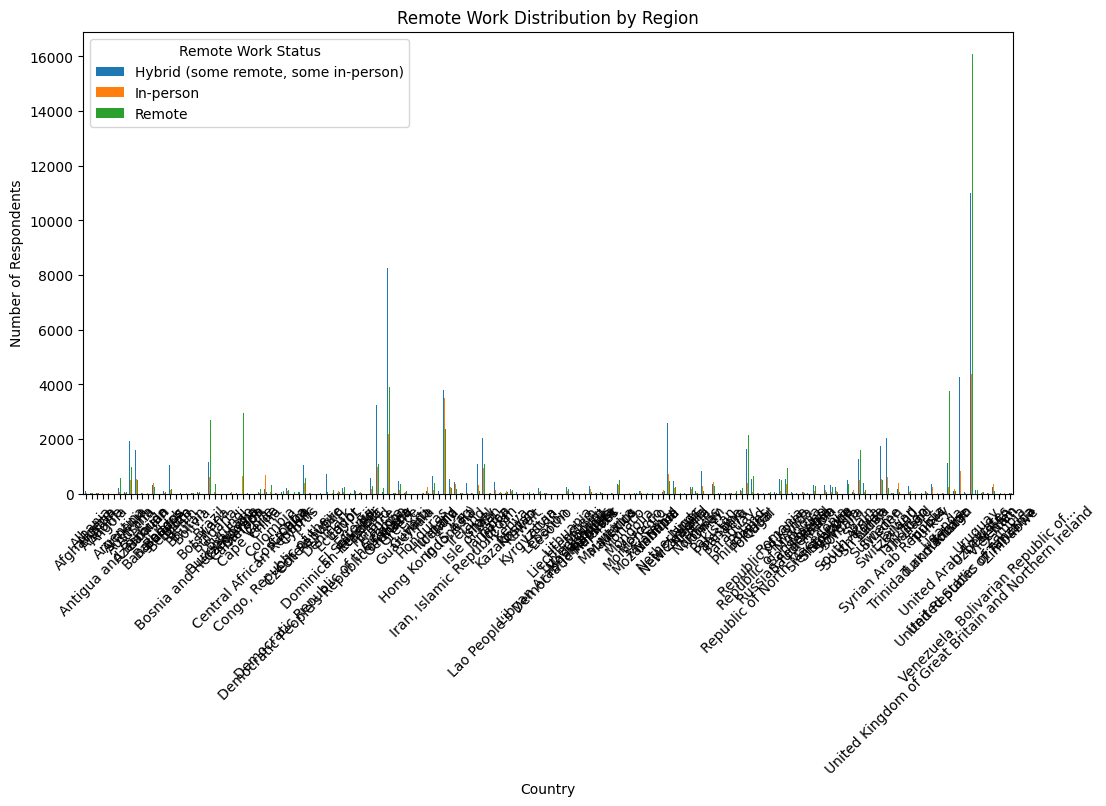

In [62]:
# Plot the grouped bar chart

remote_by_region.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Remote Work Distribution by Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Status')
#plt.tight_layout()
plt.show()

* North America & Western Europe show high full/part-time remote work.

* Asia & Africa lean more toward on-site or hybrid roles.

* Remote work adoption is region-dependent, reflecting differences in infrastructure, company policies, and culture.

##### Correlation between Job Satisfaction and Experience


* Analyze the correlation between overall job satisfaction (JobSat) and YearsCodePro.

* Calculate the Pearson or Spearman correlation coefficient.

In [64]:
from scipy.stats import pearsonr, spearmanr

# Select columns
x = df['YearsCodePro']
y = df['JobSat']

In [65]:
# Calculate Pearson correlation -->  measures linear relationship
pearson_corr, pearson_p = pearsonr(x, y)
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")

# Calculate Spearman correlation (non-parametric) --> measures monotonic relationship
spearman_corr, spearman_p = spearmanr(x, y)
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")

Pearson correlation: 0.103, p-value: 0.000e+00
Spearman correlation: 0.119, p-value: 0.000e+00


* Correlation values near 0 → little or no correlation.

* Positive values → as experience increases, satisfaction tends to increase.

* Negative values → as experience increases, satisfaction tends to decrease.

* p-values indicate statistical significance.

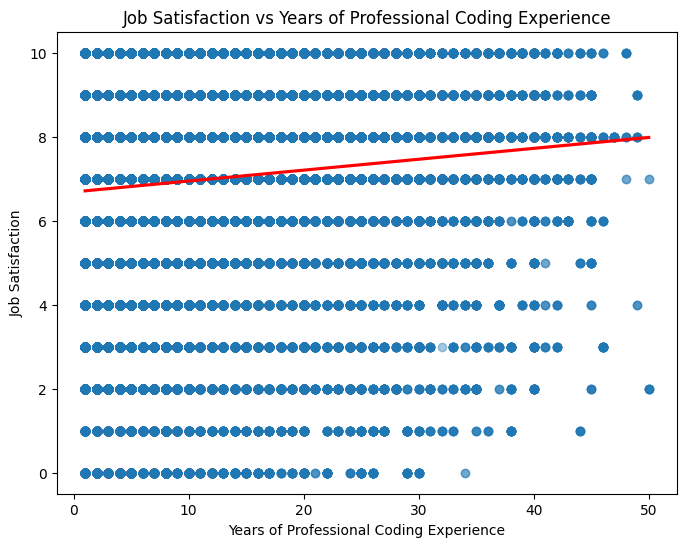

In [66]:
# Scatter plot with regression line

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Job Satisfaction vs Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()

##### Cross-tabulation Analysis (Employment vs. Education Level)

Analyze the relationship between employment status (Employment) and education level (EdLevel).

Create a cross-tabulation using pd.crosstab() and visualize it with a stacked bar plot if possible.

In [67]:
# Crosstab: counts of each Employment type per Education Level
crosstab = pd.crosstab(df['EdLevel'], df['Employment'], dropna=False)

print(crosstab)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                3665   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      53960   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   33500   
Primary/elementary school                                           494   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     5686   
Secondary school (e.g. American high school, Ge...                 5182   
Some college/university study without earning a...                12490   
Something else                                                     1119   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

C:\Users\shubh\AppData\Local\Temp\ipykernel_8148\1028702945.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


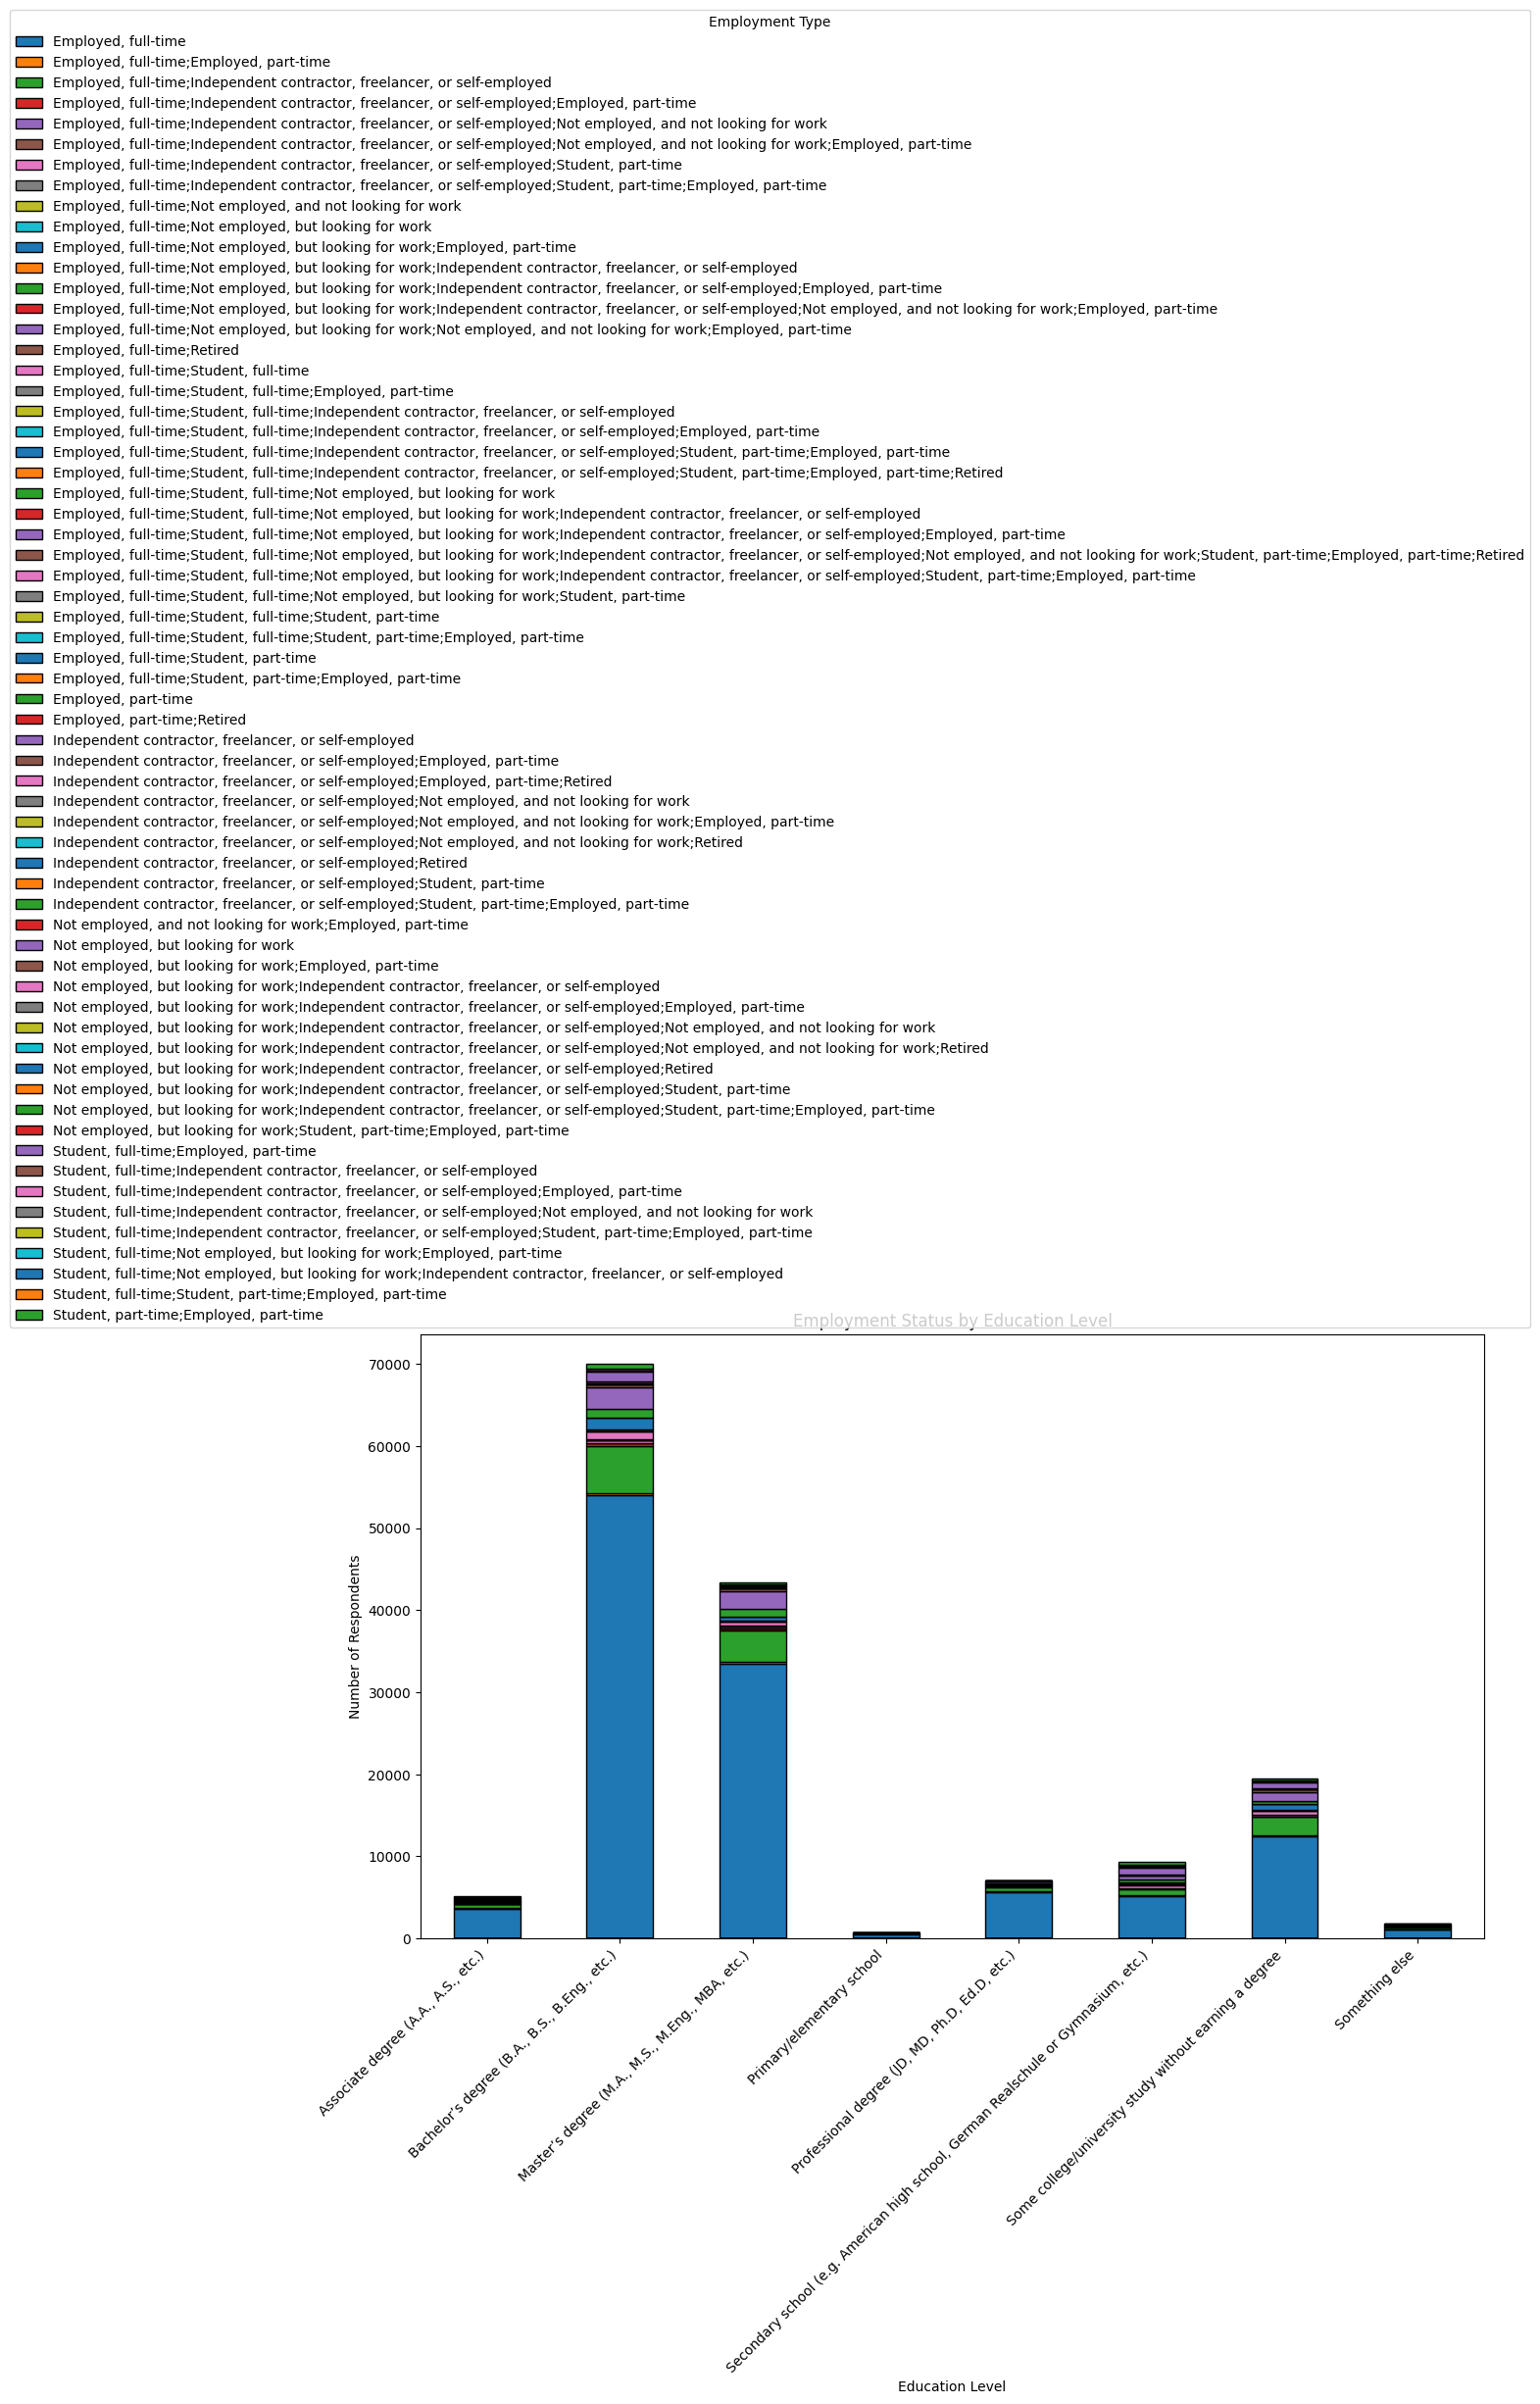

In [71]:
# Plot stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(14,8), edgecolor='black')

plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()
plt.show()


##### Save the dataset

In [74]:
df.to_csv('./cleaned_survey_data2.csv')
print("File saved successfully !")

File saved successfully !
